In [ ]:
'''
#############################################################################################
#*******************************************************************************************#
#           Copyright (c) 2020 pyCoder|semih Corporation;) All rights reserved.            ##
#                                   [Timestamp:20210505]                                   ##
#*******************************************************************************************#
#############################################################################################
'''

In [ ]:
# Class4-Statistics-Week15
# pip install seaborn

In [35]:
import seaborn as sns
titanic= sns.load_dataset('titanic')
df = titanic.copy()
# print(df.head())
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Değişkenlerin veri türlerini yazınız
# Nicel verileri describe methodu ile inceleyiniz ve verileri ortalaması, standart sapması ve çeyrekliklerine bakarak aykırılık olup olmadığını ve normal dağılıp dağılmadığı konusunda yorumda bulunun.
# Nitel verilerin dtypelarıını kategorik yapın. Sıralanabilecek kategorik değişkenlerin sıralı olarak belirleyiniz. Sıralanmış kategorik verilerin sıralaması doğru değilse sıralamayı uygun hale getirin.
# sex ve class değişkenlerini Label Encoder veya Dummies yöntemiyle sayısal verierle dönüştürünüz.
# age ve fare değişkenlerinin normalliklerini inceleyiniz.

# Hipotez Testleri:

# H0 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi yoktur
# H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.

# Değişkenlerin veri türlerini yazınız

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# Nicel verileri describe methodu ile inceleyiniz...

In [37]:
df.describe() # gelen veriler zaten nicel veriler(int64 ve float64)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# verilerin normal dagilima sahip oldugu; mean(ortalama) ve median(ortanca-%50) nin biribirine yaklinligindan anlasilabilir.
# Eger birbirine yakinsa normal dagilim(parametrik), degilse normal dagilim degildir diyebiliriz.
# yukardaki NICEL verilerde 'age' in normal dagilim gosterdigini soyleyebiliriz.

# Nitel verilerin dtype larını kategorik yapın...

In [38]:
un_catego = df.select_dtypes(include=["object","bool"])
un_catego

,sex,embarked,who,adult_male,embark_town,alive,alone
0,male,S,man,True,Southampton,no,False
1,female,C,woman,False,Cherbourg,yes,False
2,female,S,woman,False,Southampton,yes,True
3,female,S,woman,False,Southampton,yes,False
4,male,S,man,True,Southampton,no,True
...,...,...,...,...,...,...,...
886,male,S,man,True,Southampton,no,True
887,female,S,woman,False,Southampton,yes,True
888,female,S,woman,False,Southampton,no,False
889,male,C,man,True,Cherbourg,yes,True


In [39]:
df.sex = df.sex.astype("category")
df.embarked = df.embarked.astype("category")
df.who = df.who.astype("category")
df.adult_male = df.adult_male.astype("category")
df.embark_town = df.embark_town.astype("category")
df.alive = df.alive.astype("category")
df.alone = df.alone.astype("category")

In [62]:
# df.info()
df_category = df.select_dtypes(include="category")
df_category

,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,S,Third,man,True,NaN,Southampton,no,False
1,C,First,woman,False,C,Cherbourg,yes,False
2,S,Third,woman,False,NaN,Southampton,yes,True
3,S,First,woman,False,C,Southampton,yes,False
4,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...
886,S,Second,man,True,NaN,Southampton,no,True
887,S,First,woman,False,B,Southampton,yes,True
888,S,Third,woman,False,NaN,Southampton,no,False
889,C,First,man,True,C,Cherbourg,yes,True


# sex ve class değişkenlerini Label Encoder veya Dummies yöntemiyle sayısal verilere dönüştürünüz.

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [91]:
df.sex = labelencoder.fit_transform(df.sex)
df.sex.value_counts()

1    577
0    314
Name: sex, dtype: int64

In [92]:
df["class"] = labelencoder.fit_transform(df["class"])
df["class"].value_counts()

2    491
0    216
1    184
Name: class, dtype: int64

# age ve fare değişkenlerinin normalliklerini inceleyiniz.

In [73]:
import pandas as pd
from scipy.stats import norm

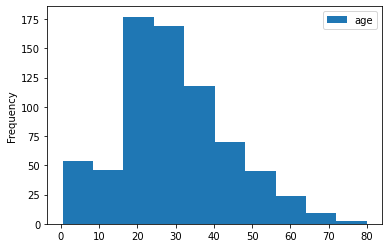

In [87]:
pd.DataFrame(df.age).plot.hist();

In [77]:
import pylab

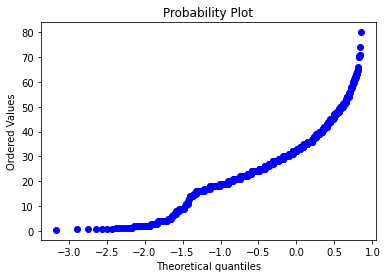

In [86]:
stats.probplot(df.age,dist="norm",plot=pylab)
pylab.show()

In [81]:
from scipy.stats import shapiro

In [88]:
shapiro(df.age)

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
# age verilerinin pvalue degeri > 0.5 oldugu icin NORMAL DAGILIMA sahiptir. zaten grafiklerde de gorunuyor.

In [89]:
shapiro(df.fare)

ShapiroResult(statistic=0.5218914747238159, pvalue=1.0789998175301091e-43)

In [ ]:
# fare verilerinin pvalue degeri < 0.5 oldugu icin NORMAL DAGILIMA sahip DEGILDIR.(0.0000)

# Hipotez Testleri:

In [ ]:
# H0 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi yoktur
# H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.

In [90]:
# class ile alive kolon degerlerini baz alabiliriz.

In [93]:
from scipy.stats import normaltest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest

In [95]:

df["alive"]=labelencoder.fit_transform(df["alive"])

In [96]:
A=df["class"]
B=df["alive"]
A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,2,0
1,0,1
2,2,1
3,0,1
4,2,0


In [97]:

A=df["class"]
B=df["alive"]
#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])

AB.head()

,class,0,alive
0,2.0,A,NaN
1,0.0,A,NaN
2,2.0,A,NaN
3,0.0,A,NaN
4,2.0,A,NaN


In [98]:
AB.tail()

,class,0,alive
886,NaN,B,0.0
887,NaN,B,1.0
888,NaN,B,0.0
889,NaN,B,1.0
890,NaN,B,0.0


In [99]:
shapiro(A_B.A)

ShapiroResult(statistic=0.7183380126953125, pvalue=3.3958725291830076e-36)

In [102]:
import scipy.stats as stats

In [103]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=90.04223321250018, pvalue=7.189908883210466e-21)

In [104]:
# pvalue 0.05 den coook kucuk oldugu icin H0 hipotezi red edilir. yani H1 kabul edilmis olur.
# H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.